## Data Preprocessing for GTZAN Audio File Dataset
Written by Samantha Hawco, 20167916 <br>
Date started: 2023-11-17 <br>
Last modified: 2023-11-17

Status: intial writing

In [13]:
#imports
import numpy as np
import pandas as pd
import os
from pydub import AudioSegment
import matplotlib.pyplot as plt

import shutil
from IPython.display import display, Markdown

In [14]:
#get full paths for all files
testid, trainid = [], []
testdir, traindir = './data/testing/', './data/training'
for genre_dir, _, filenames in os.walk('./data/genres_original'):
    #genre_dir = os.path.normpath(genre_dir)
    genre = os.path.basename(genre_dir)
    testf, trainf = filenames[:20], filenames[20:]

    # copy test files into test directory
    for f in testf:
        shutil.copy(os.path.join(genre_dir, f), os.path.join(testdir, genre))
        testid.append(f)
    # copy training files into training directory
    for f in trainf:
        if f != 'jazz.00054.wav':
            shutil.copy(os.path.join(genre_dir, f), os.path.join(traindir, genre))  
            trainid.append(f)


['./data/genres_original/blues/blues.00000.wav',
 './data/genres_original/blues/blues.00001.wav',
 './data/genres_original/blues/blues.00002.wav',
 './data/genres_original/blues/blues.00003.wav',
 './data/genres_original/blues/blues.00004.wav']

In [31]:
# separate training and testing data into a dataframe
def separate(d):
    paths, bases, filenames = [], [], []
    for genrepath, _, files in os.walk(d):
        for file in files:
            
            # full file path
            filepath = os.path.join(genrepath, file)
            #print(os.path.normpath(filepath))
            paths.append(filepath)
            # basename
            base = os.path.basename(genrepath)
           
            bases.append(base)
            # file name
            filenames.append(file)
            
            trimaudio(filepath.replace("\\", "/" ), file, d)
   
    frame = pd.DataFrame({
        'Path' : paths,
        'Label': bases,
        'File': filenames,
    })
    return frame

def trimaudio(path, name, dir):
    #print(path)
    cap = 29000 # miliseconds
    if os.path.exists(path):
        full_audio = AudioSegment.from_file(path, format="wav")
    else:
        print(f"File not found: {path}")

    cut_audio = full_audio[:cap]
    cut_audio.export(os.path.join(dir, 'clips', name), format='wav')


In [32]:
# create dataframes for testing and training data
trainframe_wpath, testframe_wpath = separate(traindir), separate(testdir)
display(Markdown("### Training Data (+ Path)"), trainframe_wpath, Markdown('### Testing Data (+ Path)'), testframe_wpath)

### Training Data (+ Path)

,Path,Label,File
0,./data/training\blues\blues.00020.wav,blues,blues.00020.wav
1,./data/training\blues\blues.00021.wav,blues,blues.00021.wav
2,./data/training\blues\blues.00022.wav,blues,blues.00022.wav
3,./data/training\blues\blues.00023.wav,blues,blues.00023.wav
4,./data/training\blues\blues.00024.wav,blues,blues.00024.wav
...,...,...,...
1593,./data/training\rock\rock.00095.wav,rock,rock.00095.wav
1594,./data/training\rock\rock.00096.wav,rock,rock.00096.wav
1595,./data/training\rock\rock.00097.wav,rock,rock.00097.wav
1596,./data/training\rock\rock.00098.wav,rock,rock.00098.wav


### Testing Data (+ Path)

,Path,Label,File
0,./data/testing/blues\blues.00000.wav,blues,blues.00000.wav
1,./data/testing/blues\blues.00001.wav,blues,blues.00001.wav
2,./data/testing/blues\blues.00002.wav,blues,blues.00002.wav
3,./data/testing/blues\blues.00003.wav,blues,blues.00003.wav
4,./data/testing/blues\blues.00004.wav,blues,blues.00004.wav
...,...,...,...
395,./data/testing/rock\rock.00015.wav,rock,rock.00015.wav
396,./data/testing/rock\rock.00016.wav,rock,rock.00016.wav
397,./data/testing/rock\rock.00017.wav,rock,rock.00017.wav
398,./data/testing/rock\rock.00018.wav,rock,rock.00018.wav


In [33]:
# drop the path column
trainframe, testframe = trainframe_wpath.drop(['Path'], axis=1), testframe_wpath.drop(['Path'], axis=1) 
display(Markdown("### Training Data"), trainframe, Markdown('### Testing Data'), testframe)

### Training Data

,Label,File
0,blues,blues.00020.wav
1,blues,blues.00021.wav
2,blues,blues.00022.wav
3,blues,blues.00023.wav
4,blues,blues.00024.wav
...,...,...
1593,rock,rock.00095.wav
1594,rock,rock.00096.wav
1595,rock,rock.00097.wav
1596,rock,rock.00098.wav


### Testing Data

,Label,File
0,blues,blues.00000.wav
1,blues,blues.00001.wav
2,blues,blues.00002.wav
3,blues,blues.00003.wav
4,blues,blues.00004.wav
...,...,...
395,rock,rock.00015.wav
396,rock,rock.00016.wav
397,rock,rock.00017.wav
398,rock,rock.00018.wav


In [34]:
#send train to csv
testframe.to_csv('./data/testing.csv', index = False)
trainframe.to_csv('./data/training.csv', index = False)

### Exploring/Visualizing Feature Data

In [ ]:
#see format and features of 30 data
feat_data = pd.read_csv(f'./data/features_30_sec.csv')
feat_data.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,1.297741e+05,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,3.758501e+05,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,1.564676e+05,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,1.843559e+05,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,3.433999e+05,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
5,blues.00005.wav,661794,0.302456,0.087532,0.103494,0.003981,1831.993940,1.030482e+06,1729.653287,201910.508633,...,72.549225,-1.838263,68.702026,-2.783800,42.447453,-3.047909,39.808784,-8.109991,46.311005,blues
6,blues.00006.wav,661794,0.291328,0.093981,0.141874,0.008803,1459.366472,4.378594e+05,1389.009131,185023.239545,...,83.248245,-10.913176,56.902153,-6.971336,38.231800,-3.436505,48.235741,-6.483466,70.170364,blues
7,blues.00007.wav,661794,0.307955,0.092903,0.131822,0.005531,1451.667066,4.495682e+05,1577.270941,168211.938804,...,70.438438,-10.568935,52.090893,-10.784515,60.461330,-4.690678,65.547516,-8.630722,56.401436,blues
8,blues.00008.wav,661794,0.408879,0.086512,0.142416,0.001507,1719.368948,1.632828e+05,2031.740381,105542.718193,...,50.563751,-7.041824,28.894934,2.695248,36.889568,3.412305,33.698597,-2.715692,36.418430,blues
9,blues.00009.wav,661794,0.273950,0.092316,0.081314,0.004347,1817.150863,2.982361e+05,1973.773306,114070.112591,...,59.314602,-1.916804,58.418438,-2.292661,83.205231,2.881967,77.082222,-4.235203,91.468811,blues


In [ ]:
#see how much data for each label
feat_data.label.value_counts().reset_index()

,label,count
0,blues,100
1,classical,100
2,country,100
3,disco,100
4,hiphop,100
5,jazz,100
6,metal,100
7,pop,100
8,reggae,100
9,rock,100


In [ ]:
#generate list of genres 
genres = feat_data['label'].unique()
print(genres)

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [ ]:
sample_audios = {}
for type in genres:
    filtered_train = train[train['label']==type]

    if not filtered_train.empty:
        random_audio = filtered_train.sample(n=1).iloc[0]['file']
        sample_audios[type] = random_audio

sample_audios

{'blues': 'blues.00042.wav',
 'classical': 'classical.00012.wav',
 'country': 'country.00070.wav',
 'disco': 'disco.00028.wav',
 'hiphop': 'hiphop.00066.wav',
 'jazz': 'jazz.00060.wav',
 'metal': 'metal.00012.wav',
 'pop': 'pop.00091.wav',
 'reggae': 'reggae.00026.wav',
 'rock': 'rock.00024.wav'}

In [ ]:
#Example Code from https://www.kaggle.com/code/wojciechbrol/musicgenreclassification
## Modify or remove for submission ##
from IPython.display import Audio
audios = {}
for audio in sample_audios.keys():
    aud_path = f'./data/clips/{sample_audios[audio]}'
    audios[audio]=aud_path

print("Blues Sample")
Audio(audios['blues'])



Blues Sample


In [ ]:
print("Pop Sample")
Audio(audios['pop'])

Pop Sample


In [ ]:
colors = {
    'blues': '#1F77B4',
    'classical': '#FF7F0E',
    'country': '#2CA02C',
    'disco': '#D62728',
    'hiphop': '#9467BD',
    'jazz': '#8C564B',
    'metal': '#E377C2',
    'pop': '#7F7F7F',
    'reggae': '#BCBD22',
    'rock': '#17BECF'
}

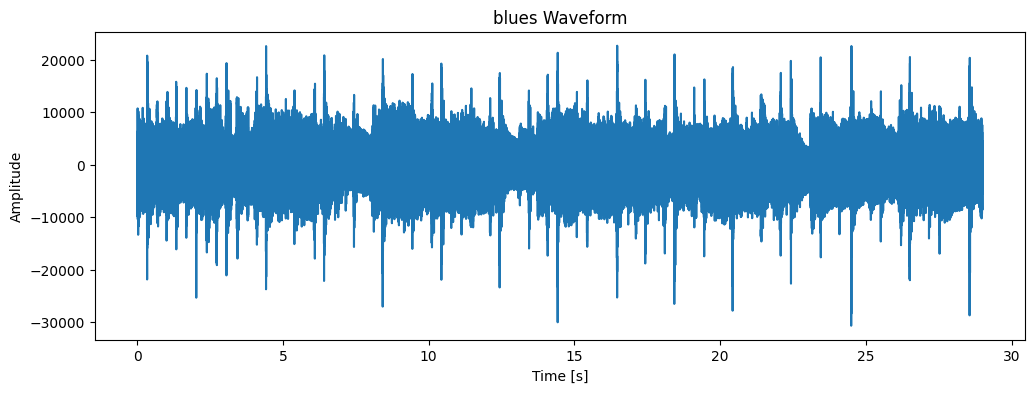

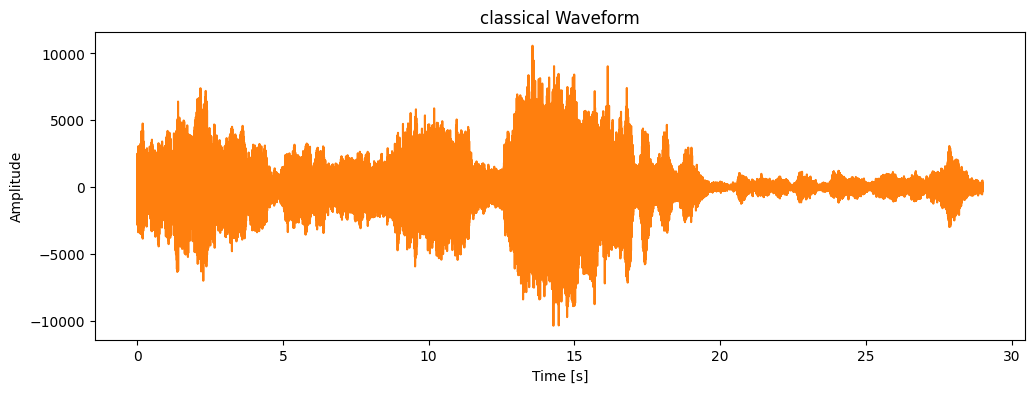

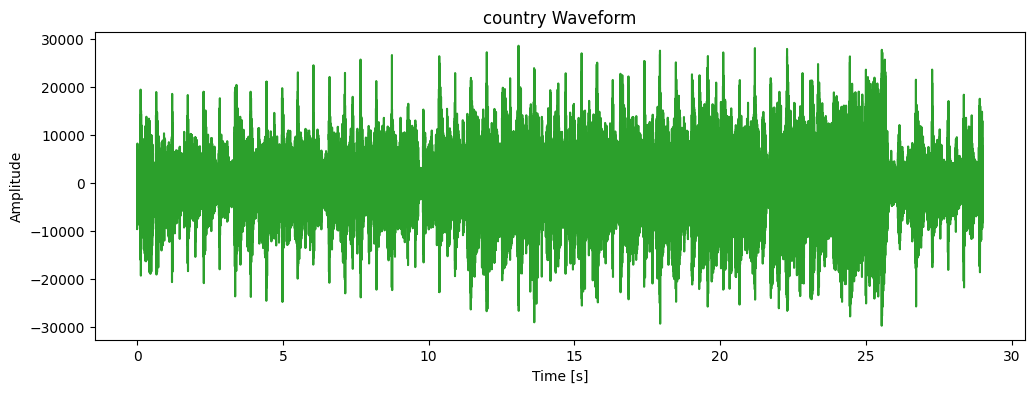

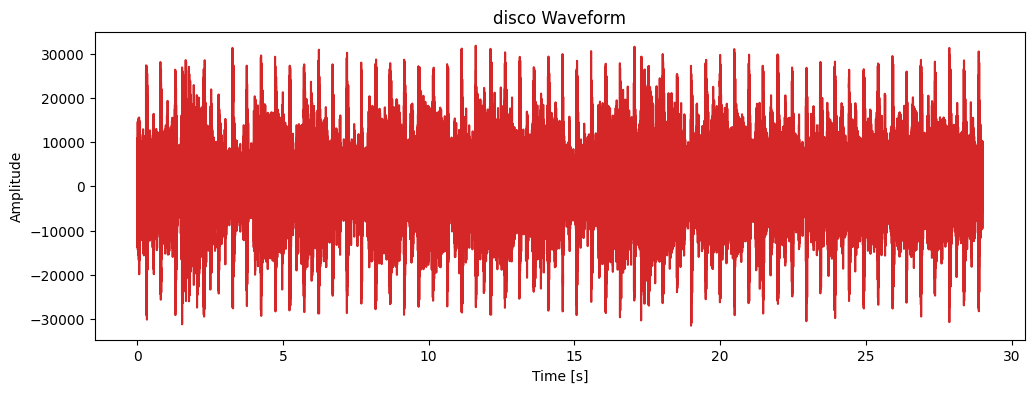

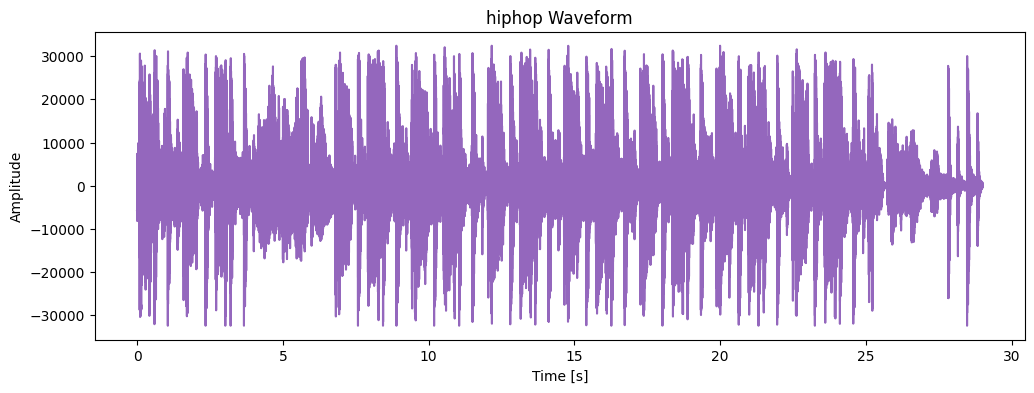

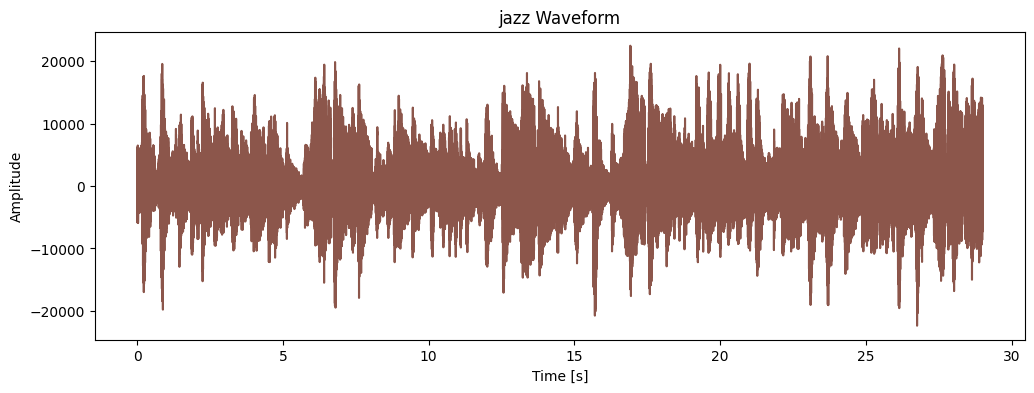

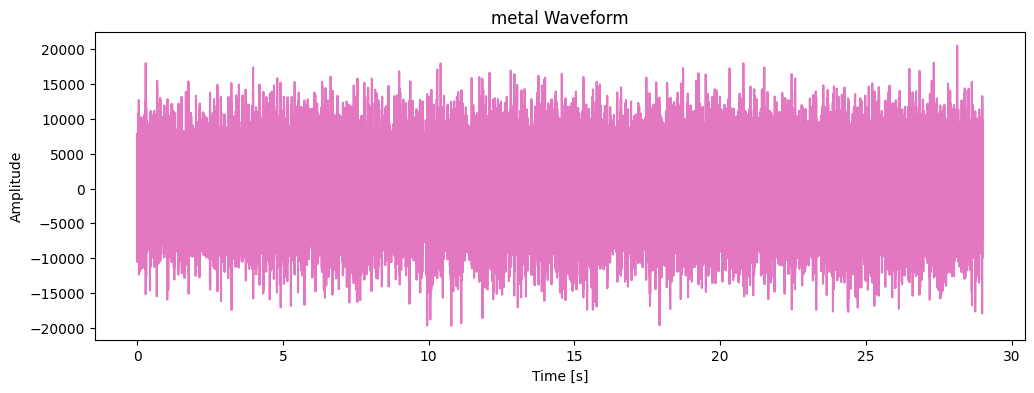

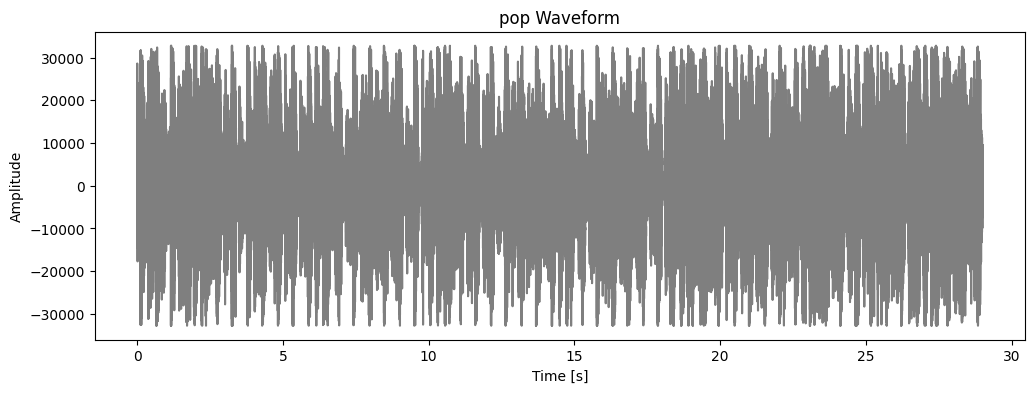

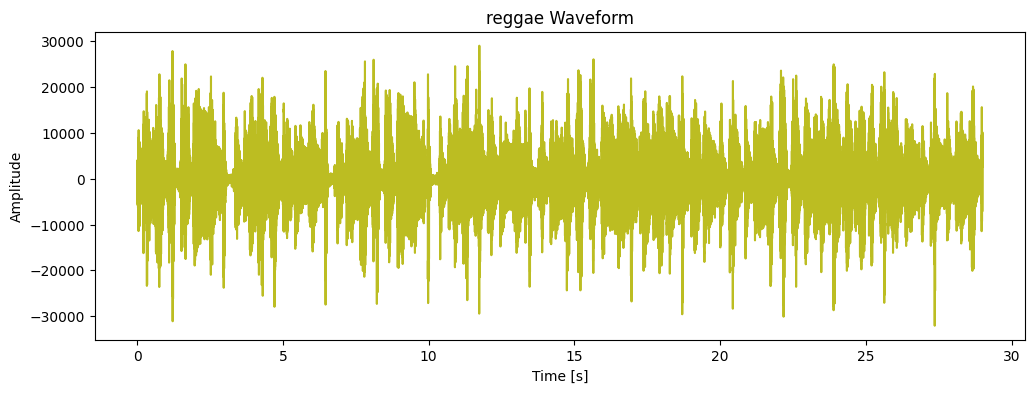

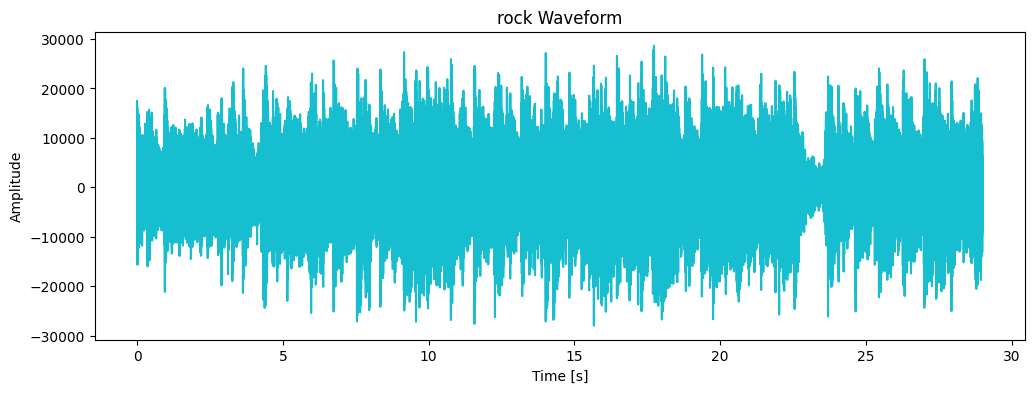

In [ ]:
import wave

for type in genres:

    with wave.open(audios[type], 'r') as wav_file:
        signal = wav_file.readframes(-1)
        signal = np.frombuffer(signal, dtype=np.int16)

        nframes = wav_file.getnframes()

        # Get the frame rate
        framerate = wav_file.getframerate()

        # Create the time axis for the data
        time = np.linspace(0, nframes/framerate, num=nframes)

    # Plot the waveform
    plt.figure(figsize=(12, 4))
    plt.plot(time, signal, color = colors[type])
    plt.title(type +' Waveform')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

plt.show()



#for audio in audios.keys():
 #   plt.figure(figsize=(12,4))
  #  plt.title(f'Waveplot for {audio} music genre sample',size=15)

